# 📌 Red Wine Quality Classification Analysis + EDA  

레드와인 분류 실습

# 1. Overview
독립변수 : fixed aciditi, volatile acidity 외 9개, 총 11개의 독립변수  
종속변수 : quality, 0과 10 사이의 값

In [1]:
from google.colab import drive
drive.mount('/content/drive')

file_path = "/content/drive/My Drive/EuronData/"

Mounted at /content/drive


# 2. Importing Libraries and Reading the Dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from collections import Counter
from IPython.core.display import display, HTML
sns.set_style('darkgrid')

In [3]:
dataset = pd.read_csv(file_path + "winequality-red.csv")
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# 3. Data Visualization and Preprocessing

In [4]:
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

-> 결측값이 하나도 없다!

In [5]:
bins = (2, 6.5, 8)
labels = ['bad', 'good']
dataset['quality'] = pd.cut(x = dataset['quality'], bins = bins, labels = labels)

데이터셋의 quality 변수 열을 (2, 6.5], (6.5, 8] 구간으로 쪼개서 앞 구간엔 bad를 뒤쪽 구간엔 good을 라벨링한다.  
(왜 bins = (0, 6.5, 10)으로 안하고 2와 8을 사용했는지 궁금했는데 확인해보니 아무래도 0과 2 사이, 8과 10 사이 값을 갖는 quality가 없어서 그런 것 같다.)

In [6]:
dataset['quality'].value_counts()

bad     1382
good     217
Name: quality, dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
dataset['quality'] = labelencoder_y.fit_transform(dataset['quality'])

라벨 인코더로 퀄리티 변수에 있는 변수들을 0, 1로 인코딩

In [8]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


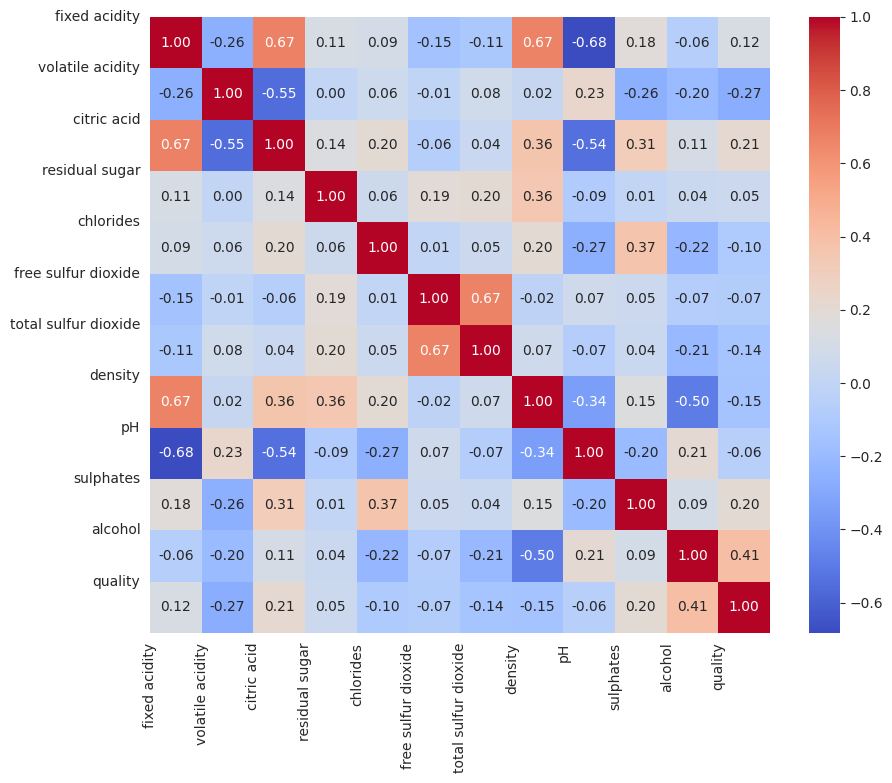

In [9]:
corr = dataset.corr()
#Plot figsize  플롯 사이즈 지정
fig, ax = plt.subplots(figsize=(10, 8))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")  #힛맵 그리기!
#Apply xticks  x축 눈금그리기
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks  y축 눈금그리기
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

종속변수인 quality와 관련된 상관계수 위주로 보자면,
- quality는 residual sugar, pH과는 굉장히 작은 상관관계를 갖는다.
- 가장 큰 상관계수를 갖는 변수는 alcohol로 0.41의 상관계수를 갖는다.

In [10]:
sns.set_palette('pastel')

데이터 변수별 시각화

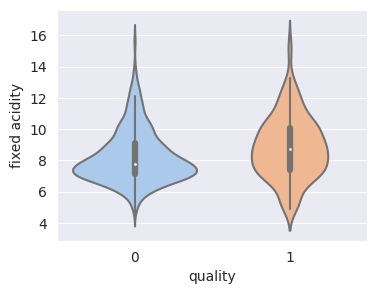

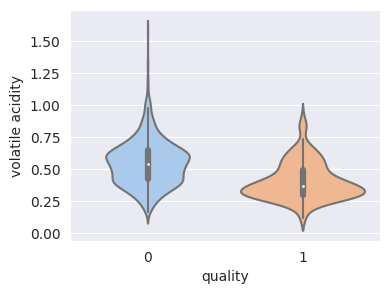

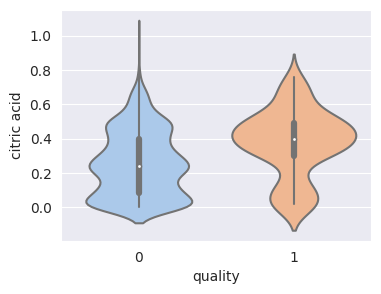

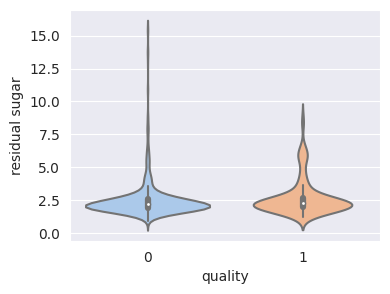

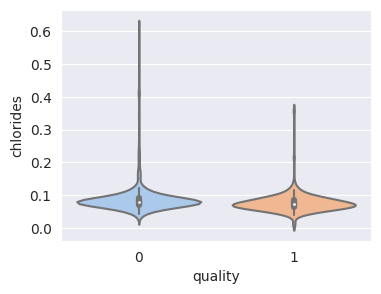

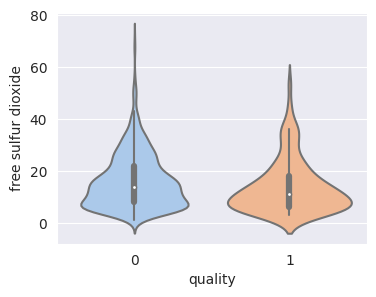

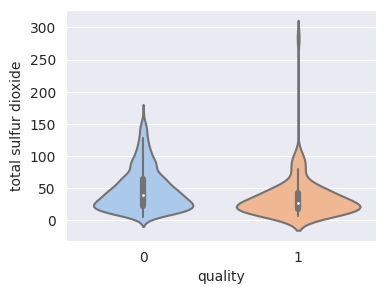

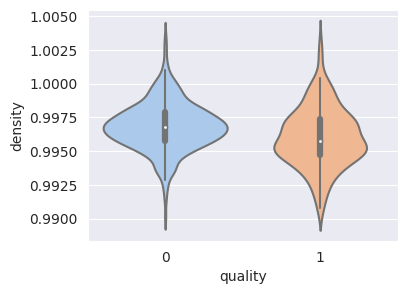

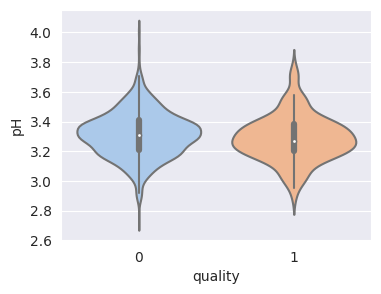

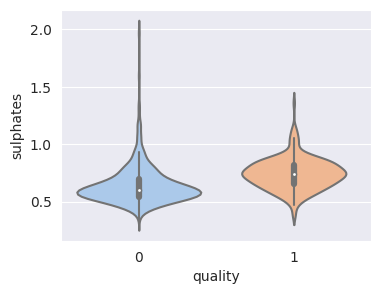

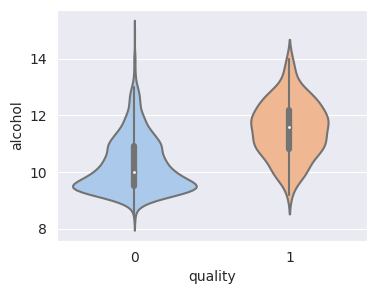

In [11]:
#바이올린 플롯 생성
for i in dataset.columns[:-1]:
  ax = plt.subplots(figsize=(4, 3))
  ax = sns.violinplot(x = 'quality', y = i, data = dataset)

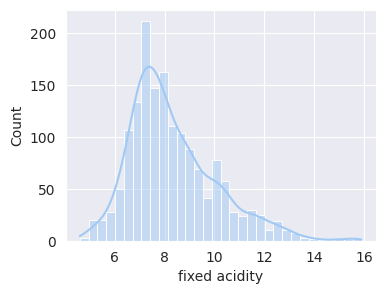

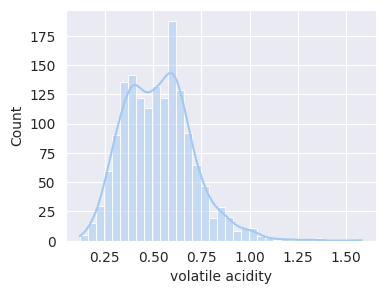

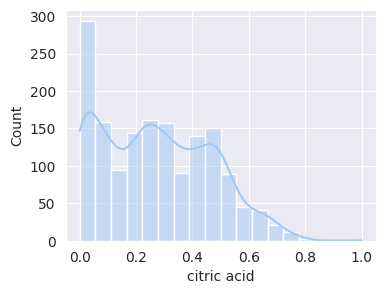

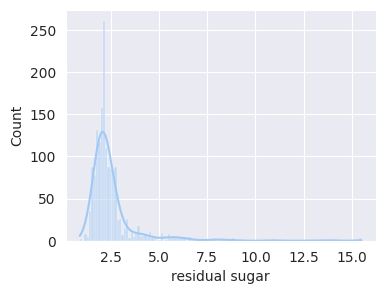

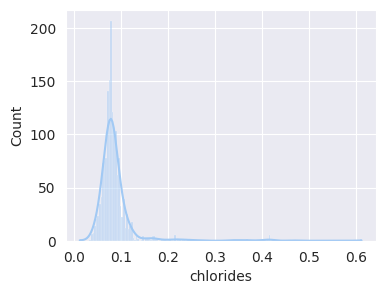

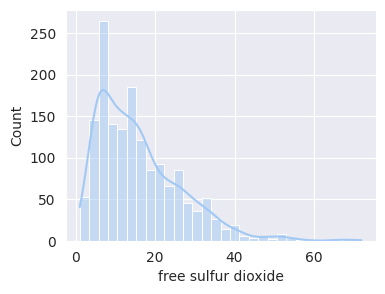

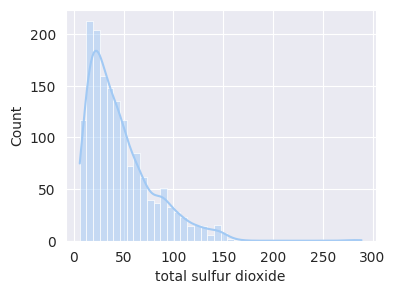

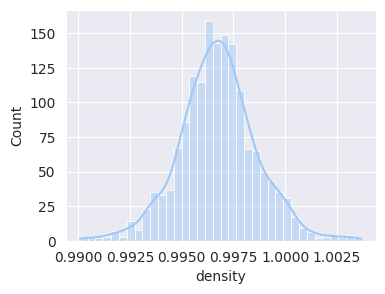

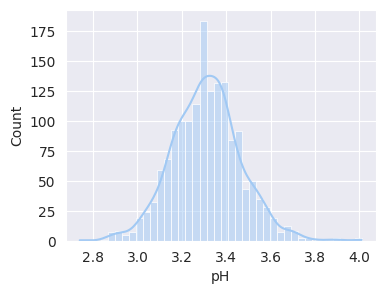

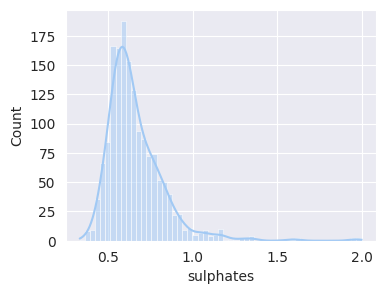

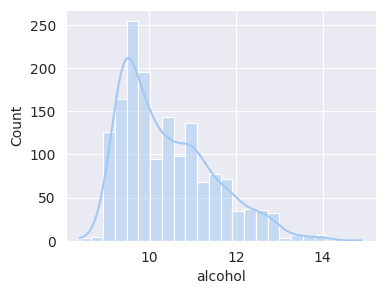

In [12]:
#히스토그램 생
for i in dataset.columns[:-1]:
  ax = plt.subplots(figsize=(4, 3))
  ax = sns.histplot(x=dataset[i],
                    kde=True,
                    cumulative=False
                    )

각 변수별 분포를 확인 가능
- symmetric(bell-shaped) : Density, Ph
- right-skewed : 위 제외 전부.

In [13]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.135710
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.342587
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


In [14]:
dataset['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

학습/검증 데이터 분리

In [15]:
X = dataset.drop('quality', axis = 1).values
y = dataset['quality'].values.reshape(-1, 1)

In [16]:
#학습/검증용 데이터로 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [17]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (1279, 11)
Shape of X_test:  (320, 11)
Shape of y_train:  (1279, 1)
Shape of y_test (320, 1)


# 4. Classification Models

In [18]:
#피처 스케일링
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

## 4.1 Logistic Regression

In [19]:
#Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(C=1, fit_intercept=True, max_iter=1000, penalty = 'l2', solver='liblinear')
classifier_lr.fit(X_train_scaled, y_train.ravel())

LogisticRegression(C=1, max_iter=1000, solver='liblinear')

- 규제의 강도는 1
- 회귀 수식에서 y절편을 포함하기로 설정
- 최대 반복 횟수는 1000번
- L2규제 적용, solver는 liblinear 적용.  
*solver -> 비용함수를 최소화하는 최상의 가중치를 찾기 위한 알고리즘  
*ravel -> 넘파이 내장 함수로 다차원 배열을 1차원 배열로 바꿔준다

In [20]:
#Predicting Cross Validation Score
cv_lr = cross_val_score(estimator = classifier_lr, X = X_train_scaled, y = y_train.ravel(), cv = 10)
print("CV: ", cv_lr.mean())

y_pred_lr_train = classifier_lr.predict(X_train_scaled)
accuracy_lr_train = accuracy_score(y_train, y_pred_lr_train)
print("Training set: ", accuracy_lr_train)

y_pred_lr_test = classifier_lr.predict(X_test_scaled)
accuracy_lr_test = accuracy_score(y_test, y_pred_lr_test)
print("Test set: ", accuracy_lr_test)

CV:  0.885857529527559
Training set:  0.8858483189992181
Test set:  0.875


- 10개 교차 검증 폴드로 cross-validation 예측성능 측정 -> 0.8859
- 학습 데이터 정확도 -> 0.8858
- 검증 데이터 정확도 -> 0.875

In [21]:
confusion_matrix(y_test, y_pred_lr_test)

array([[268,   5],
       [ 35,  12]])

In [22]:
tp_lr = confusion_matrix(y_test, y_pred_lr_test)[0,0]  #268
fp_lr = confusion_matrix(y_test, y_pred_lr_test)[0,1]  #5
tn_lr = confusion_matrix(y_test, y_pred_lr_test)[1,1]  #12
fn_lr = confusion_matrix(y_test, y_pred_lr_test)[1,0]  #35
#TN이 원래 [0, 0]인데 여기선 bad를 positive로 취급하는 것으로 생각됨.

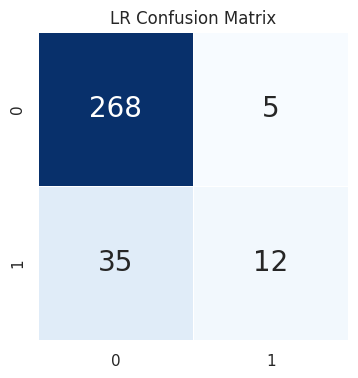

In [23]:
#confusion matrix 시각화
sns.set(rc = {'figure.figsize':(4,4)})
conf_table = confusion_matrix(y_test, y_pred_lr_test)

plt.title("LR Confusion Matrix")

sns.heatmap(conf_table, cbar=False, annot=True, cmap="Blues", fmt="d", linewidths=0.5, annot_kws={"size": 20})

plt.show()

## 5.2 K-Nearest Neighbors(K-NN)

In [24]:
#학습시키기
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(leaf_size = 1, metric = 'minkowski', n_neighbors = 32, weights = 'distance')
classifier_knn.fit(X_train_scaled, y_train.ravel())

KNeighborsClassifier(leaf_size=1, n_neighbors=32, weights='distance')

- leaf_size = 1 트리에 전달하는 리프의 크기가 1 -> 아주 세세히 분류
- 거리측정 방식은 minkowsi(유클리드 거리, 맨하탄 거리 모두 표현 가능,여기선 그 둘을 결정하는 p값을 설정 안해서 디폴트인 유클리드로 설정)
- 가까운 데이터 32개까지를 고려
- weight = distance 가까운 이웃이 멀리 있는 이웃보다 더 큰 가중치를 가짐

In [25]:
# Predicting Cross Validation Score
cv_knn = cross_val_score(estimator = classifier_knn, X = X_train_scaled, y = y_train.ravel(), cv = 10)
print("CV: ", cv_knn.mean())

y_pred_knn_train = classifier_knn.predict(X_train_scaled)
accuracy_knn_train = accuracy_score(y_train, y_pred_knn_train)
print("Training set: ", accuracy_knn_train)

y_pred_knn_test = classifier_knn.predict(X_test_scaled)
accuracy_knn_test = accuracy_score(y_test, y_pred_knn_test)
print("Test set: ", accuracy_knn_test)

CV:  0.9022699311023622
Training set:  1.0
Test set:  0.859375


- 10개 교차 검증 폴드로 cross-validation 예측성능 측정 -> 0.9023
- 학습 데이터 정확도 -> 1
- 검증 데이터 정확도 -> 0.8594

In [26]:
confusion_matrix(y_test, y_pred_knn_test)

array([[265,   8],
       [ 37,  10]])

In [27]:
tp_knn = confusion_matrix(y_test, y_pred_knn_test)[0,0]   #265
fp_knn = confusion_matrix(y_test, y_pred_knn_test)[0,1]   #8
tn_knn = confusion_matrix(y_test, y_pred_knn_test)[1,1]   #10
fn_knn = confusion_matrix(y_test, y_pred_knn_test)[1,0]   #37

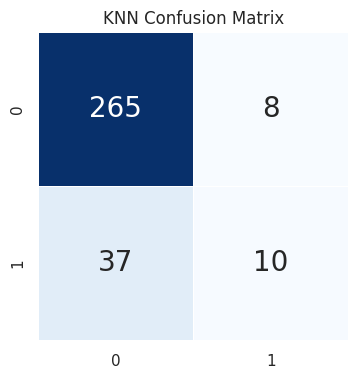

In [28]:
conf_table = confusion_matrix(y_test, y_pred_knn_test)

plt.title("KNN Confusion Matrix")

sns.heatmap(conf_table, cbar=False, annot=True, cmap="Blues", fmt="d", linewidths=0.5, annot_kws={"size": 20})

plt.show()

## 5.3 Support Vector Machine(SVM-Linear)

In [29]:
#Fitting classifier to the Training set
from sklearn.svm import SVC
classifier_svm_linear = SVC(kernel = 'linear')
classifier_svm_linear.fit(X_train_scaled, y_train.ravel())

SVC(kernel='linear')

- 선형 SVM을 쓰겠다!

In [30]:
#Prediting Cross Validation Score
cv_svm_linear = cross_val_score(estimator = classifier_svm_linear, X = X_train_scaled, y = y_train.ravel(), cv = 10)
print("CV:", cv_svm_linear.mean())

y_pred_svm_linear_train = classifier_svm_linear.predict(X_train_scaled)
accuracy_svm_linear_train = accuracy_score(y_train, y_pred_svm_linear_train)
print("Training set:", accuracy_svm_linear_train)

y_pred_svm_linear_test = classifier_svm_linear.predict(X_test_scaled)
accuracy_svm_linear_test = accuracy_score(y_test, y_pred_svm_linear_test)
print("Test set:", accuracy_svm_linear_test)

CV: 0.8670829232283465
Training set: 0.8670836591086787
Test set: 0.853125


- 10개 교차 검증 폴드로 cross-validation 예측성능 측정 -> 0.8671
- 학습 데이터 정확도 -> 0.8671
- 검증 데이터 정확도 -> 0.8531


In [31]:
confusion_matrix(y_test, y_pred_svm_linear_test)

array([[273,   0],
       [ 47,   0]])

In [32]:
tp_svm_linear = confusion_matrix(y_test, y_pred_svm_linear_test)[0,0]  #273
fp_svm_linear = confusion_matrix(y_test, y_pred_svm_linear_test)[0,1]  #0
tn_svm_linear = confusion_matrix(y_test, y_pred_svm_linear_test)[1,1]  #0
fn_svm_linear = confusion_matrix(y_test, y_pred_svm_linear_test)[1,0]  #47

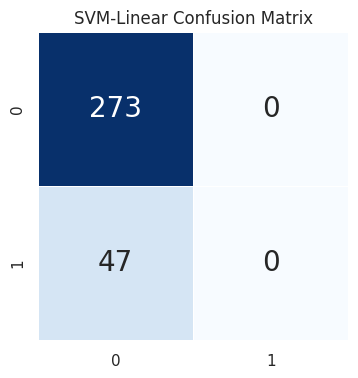

In [33]:
conf_table = confusion_matrix(y_test, y_pred_svm_linear_test)

plt.title("SVM-Linear Confusion Matrix")

sns.heatmap(conf_table, cbar=False, annot=True, cmap="Blues", fmt="d", linewidths=0.5, annot_kws={"size": 20})

plt.show()

## 5.4 Support Vector Machine(SVM-Kernel)

In [34]:
#Fitting classifier to the Training set
from sklearn.svm import SVC
classifier_svm_kernel = SVC(kernel = 'rbf', C = 10, tol = 0.001, gamma = 'scale')
classifier_svm_kernel.fit(X_train_scaled, y_train.ravel())

SVC(C=10)

- rbf 커널 사용
- C(결정 경계가 데이터에 맞춰지는 정도)을 10으로 설정, 커질수록 과적합 가능성 높아짐.
- gamma(하나의 데이터가 영향을 미치는 범위)를 1 / (n_features * X.var()) 로 사용함. 커질수록 과적합 가능성 높아짐.
- 허용 오차를 0.001로 설정

In [35]:
#Predicting Cross Validation Score
cv_svm_kernel = cross_val_score(estimator = classifier_svm_kernel, X = X_train_scaled, y = y_train.ravel(), cv = 10)
print("CV:", cv_svm_kernel.mean())

y_pred_svm_kernel_train = classifier_svm_kernel.predict(X_train_scaled)
accuracy_svm_kernel_train = accuracy_score(y_train, y_pred_svm_kernel_train)
print("Training set:", accuracy_svm_kernel_train)

y_pred_svm_kernel_test = classifier_svm_kernel.predict(X_test_scaled)
accuracy_svm_kernel_test = accuracy_score(y_test, y_pred_svm_kernel_test)
print("Test set:", accuracy_svm_kernel_test)

CV: 0.8999261811023622
Training set: 0.9421422986708365
Test set: 0.890625


- 10개 교차 검증 폴드로 cross-validation 예측성능 측정 -> 0.8999
- 학습 데이터 정확도 -> 0.9421
- 검증 데이터 정확도 -> 0.8906

In [36]:
confusion_matrix(y_test, y_pred_svm_kernel_test)

array([[262,  11],
       [ 24,  23]])

In [37]:
tp_svm_kernel = confusion_matrix(y_test, y_pred_svm_kernel_test)[0,0]  #262
fp_svm_kernel = confusion_matrix(y_test, y_pred_svm_kernel_test)[0,1]  #11
tn_svm_kernel = confusion_matrix(y_test, y_pred_svm_kernel_test)[1,1]  #23
fn_svm_kernel = confusion_matrix(y_test, y_pred_svm_kernel_test)[1,0]  #24

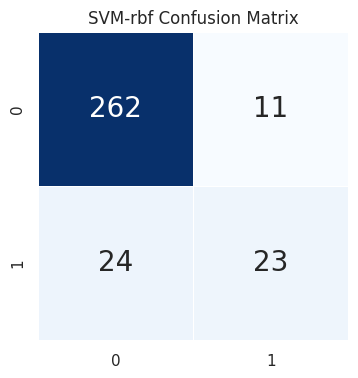

In [38]:
conf_table = confusion_matrix(y_test, y_pred_svm_kernel_test)

plt.title("SVM-rbf Confusion Matrix")

sns.heatmap(conf_table, cbar=False, annot=True, cmap="Blues", fmt="d", linewidths=0.5, annot_kws={"size": 20})

plt.show()

## 5.5 Naive Bayes

In [39]:
#Fitting classifier to the Training set
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train_scaled, y_train.ravel())

GaussianNB()

- 나이브 베이지안 적용

In [40]:
#Predicting Cross Validation Score
cv_nb = cross_val_score(estimator = classifier_nb, X = X_train_scaled, y = y_train.ravel(), cv = 10)
print("CV:", cv_nb.mean())

y_pred_nb_train = classifier_nb.predict(X_train_scaled)
accuracy_nb_train = accuracy_score(y_train, y_pred_nb_train)
print("Training set:", accuracy_nb_train)

y_pred_nb_test = classifier_nb.predict(X_test_scaled)
accuracy_nb_test = accuracy_score(y_test, y_pred_nb_test)
print("Test set:", accuracy_nb_test)

CV: 0.8373462106299213
Training set: 0.8389366692728695
Test set: 0.853125


- 10개 교차 검증 폴드로 cross-validation 예측성능 측정 -> 0.8373
- 학습 데이터 정확도 -> 0.8389
- 검증 데이터 정확도 -> 0.8531

In [41]:
confusion_matrix(y_test, y_pred_nb_test)

array([[238,  35],
       [ 12,  35]])

In [42]:
tp_nb = confusion_matrix(y_test, y_pred_nb_test)[0,0]  #238
fp_nb = confusion_matrix(y_test, y_pred_nb_test)[0,1]  #35
tn_nb = confusion_matrix(y_test, y_pred_nb_test)[1,1]  #35
fn_nb = confusion_matrix(y_test, y_pred_nb_test)[1,0]  #12

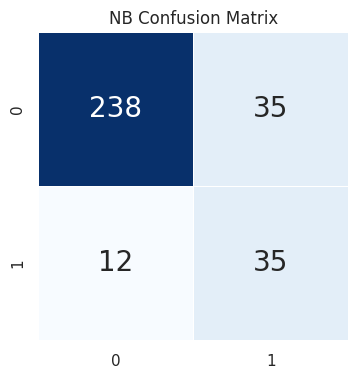

In [43]:
conf_table = confusion_matrix(y_test, y_pred_nb_test)

plt.title("NB Confusion Matrix")

sns.heatmap(conf_table, cbar=False, annot=True, cmap="Blues", fmt="d", linewidths=0.5, annot_kws={"size": 20})

plt.show()

## 5.6 Decision Tree Classification

In [44]:
#Fitting classifier to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(criterion = 'gini', max_features=6, max_leaf_nodes=400, random_state = 33)
classifier_dt.fit(X_train_scaled, y_train.ravel())

DecisionTreeClassifier(max_features=6, max_leaf_nodes=400, random_state=33)

- 지니계수 기반으로 분할
- 최대 6개 피처 고려
- 최대 리프 노드 수 400개

In [45]:
#Predicting Cross Validation Score
cv_dt = cross_val_score(estimator = classifier_dt, X = X_train_scaled, y = y_train.ravel(), cv = 10)
print("CV:", cv_dt.mean())

y_pred_dt_train = classifier_dt.predict(X_train_scaled)
accuracy_dt_train = accuracy_score(y_train, y_pred_dt_train)
print("Training set:", accuracy_dt_train)

y_pred_dt_test = classifier_dt.predict(X_test_scaled)
accuracy_dt_test = accuracy_score(y_test, y_pred_dt_test)
print("Test set:", accuracy_dt_test)

CV: 0.8967827263779528
Training set: 1.0
Test set: 0.853125


- 10개 교차 검증 폴드로 cross-validation  예측성능 측정 -> 0.8968
- 학습 데이터 정확도 -> 1
- 검증 데이터 정확도 -> 0.8531

In [46]:
confusion_matrix(y_test, y_pred_dt_test)

array([[253,  20],
       [ 27,  20]])

In [47]:
tp_dt = confusion_matrix(y_test, y_pred_dt_test)[0,0]  #253
fp_dt = confusion_matrix(y_test, y_pred_dt_test)[0,1]  #20
tn_dt = confusion_matrix(y_test, y_pred_dt_test)[1,1]  #20
fn_dt = confusion_matrix(y_test, y_pred_dt_test)[1,0]  #27

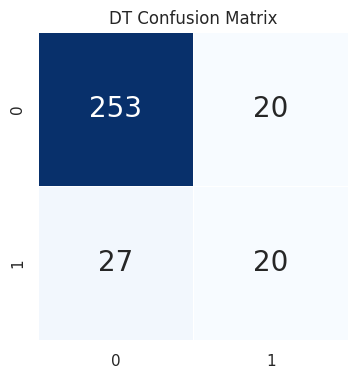

In [48]:
conf_table = confusion_matrix(y_test, y_pred_dt_test)

plt.title("DT Confusion Matrix")

sns.heatmap(conf_table, cbar=False, annot=True, cmap="Blues", fmt="d", linewidths=0.5, annot_kws={"size": 20})

plt.show()

## 5.7 RandomForest Classification

In [49]:
#Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(criterion = 'entropy', max_features = 4, n_estimators = 800, random_state=33)
classifier_rf.fit(X_train_scaled, y_train.ravel())

RandomForestClassifier(criterion='entropy', max_features=4, n_estimators=800,
                       random_state=33)

- 불순도 측정 방식 = 엔트로피 지수
- 최대 고려 피처 수 4개
- 800개 트리 생성

In [50]:
#Predicting Cross Validation Score
cv_rf = cross_val_score(estimator = classifier_rf, X = X_train_scaled, y = y_train.ravel(), cv = 10)
print("CV:", cv_rf.mean())

y_pred_rf_train = classifier_rf.predict(X_train_scaled)
accuracy_rf_train = accuracy_score(y_train, y_pred_rf_train)
print("Training set:", accuracy_rf_train)

y_pred_rf_test = classifier_rf.predict(X_test_scaled)
accuracy_rf_test = accuracy_score(y_test, y_pred_rf_test)
print("Test set:", accuracy_rf_test)

CV: 0.9140194389763779
Training set: 1.0
Test set: 0.8875


- 10개 교차 검증 폴드로 cross-validation 예측성능 측정 -> 0.9140
- 학습 데이터 정확도 -> 1
- 검증 데이터 정확도 -> 0.8875
- 실행시간 43초

In [51]:
confusion_matrix(y_test, y_pred_rf_test)

array([[266,   7],
       [ 29,  18]])

In [52]:
tp_rf = confusion_matrix(y_test, y_pred_rf_test)[0,0]  #266
fp_rf = confusion_matrix(y_test, y_pred_rf_test)[0,1]  #7
tn_rf = confusion_matrix(y_test, y_pred_rf_test)[1,1]  #18
fn_rf = confusion_matrix(y_test, y_pred_rf_test)[1,0]  #29

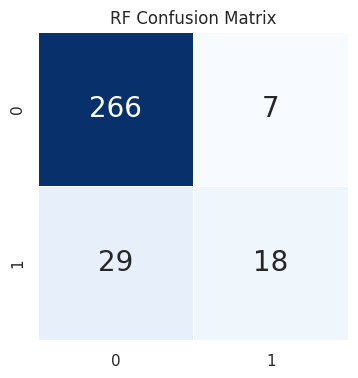

In [53]:
conf_table = confusion_matrix(y_test, y_pred_rf_test)

plt.title("RF Confusion Matrix")

sns.heatmap(conf_table, cbar=False, annot=True, cmap="Blues", fmt="d", linewidths=0.5, annot_kws={"size": 20})

plt.show()

# 6. Measuring the Error

In [54]:
models = [('Logistic Regression', tp_lr, fp_lr, tn_lr, fn_lr, accuracy_lr_train, accuracy_lr_test, cv_lr.mean()),
          ('K-Nearest Neighbors(KNN)', tp_knn, fp_knn, tn_knn, fn_knn, accuracy_knn_train, accuracy_knn_test, cv_knn.mean()),
          ('SVM(Linear)', tp_svm_linear, fp_svm_linear, tn_svm_linear, fn_svm_linear, accuracy_svm_linear_train, accuracy_svm_linear_test, cv_svm_linear.mean()),
          ('SVM(Kernel)', tp_svm_kernel, fp_svm_kernel, tn_svm_kernel, fn_svm_kernel, accuracy_svm_kernel_train, accuracy_svm_kernel_test, cv_svm_kernel.mean()),
          ('Naive Bayes', tp_nb, fp_nb, tn_nb, fn_nb, accuracy_nb_train, accuracy_nb_test, cv_nb.mean()),
          ('Decision Tree Classification', tp_dt, fp_dt, tn_dt, fn_dt, accuracy_dt_train, accuracy_dt_test, cv_dt.mean()),
          ('Random Forest Tree Classification', tp_rf, fp_rf, tn_rf, fn_rf, accuracy_rf_train, accuracy_rf_test, cv_rf.mean())
         ]

- 각 행에 각 모델에 대한 데이터 저장
- 순서대로 모델명, TP, FP, TN, FN, 학습 정확도, 검증 정확도, Cross Validation 정확도(평균)

In [55]:
predict = pd.DataFrame(data = models, columns=['Model', 'True Positive', 'False Positive', 'True Negative', 'False Negative', 'Accuracy(training)', 'Accuracy(test)', 'Cross-Validation'])

predict

,Model,True Positive,False Positive,True Negative,False Negative,Accuracy(training),Accuracy(test),Cross-Validation
0,Logistic Regression,268,5,12,35,0.885848,0.875000,0.885858
1,K-Nearest Neighbors(KNN),265,8,10,37,1.000000,0.859375,0.902270
2,SVM(Linear),273,0,0,47,0.867084,0.853125,0.867083
3,SVM(Kernel),262,11,23,24,0.942142,0.890625,0.899926
4,Naive Bayes,238,35,35,12,0.838937,0.853125,0.837346
5,Decision Tree Classification,253,20,20,27,1.000000,0.853125,0.896783
6,Random Forest Tree Classification,266,7,18,29,1.000000,0.887500,0.914019


- 데이터 프레임에 각 모델 평가 저장

## 모델 성능 시각화

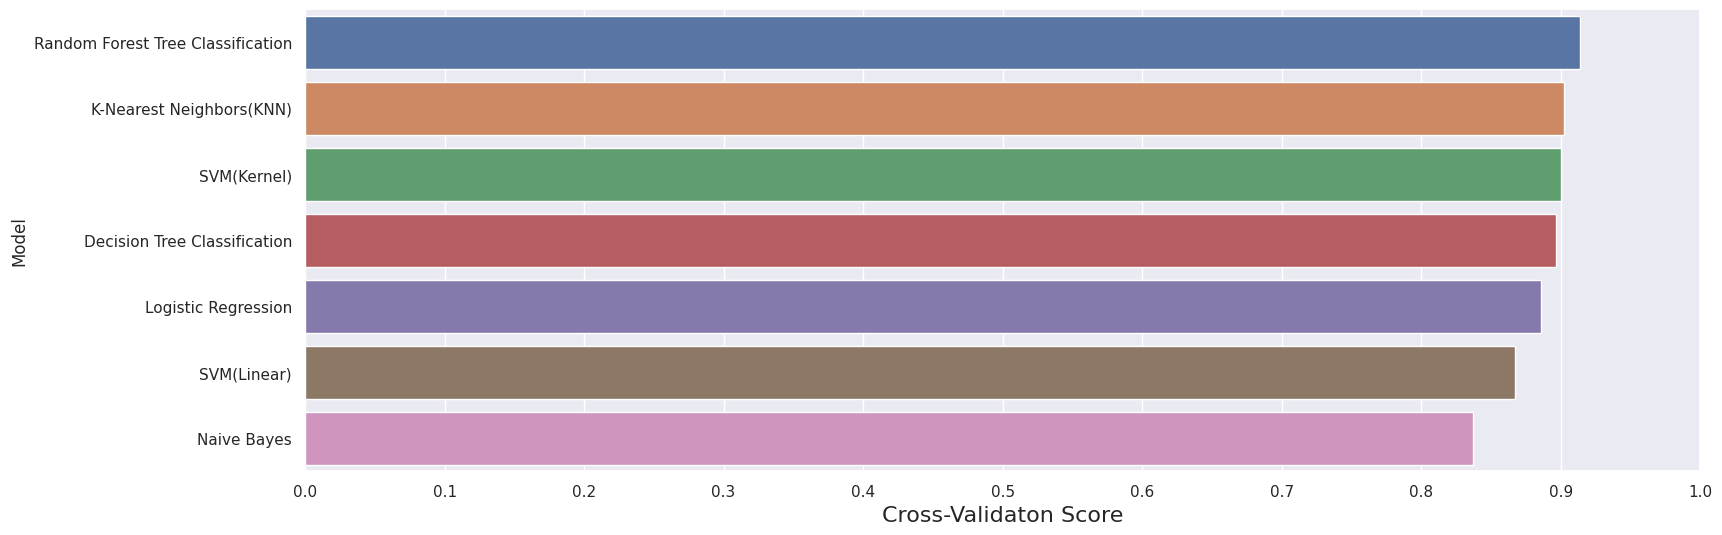

In [56]:
f, axe = plt.subplots(1,1, figsize=(18,6))

predict.sort_values(by=['Cross-Validation'], ascending = False, inplace = True)

sns.barplot(x='Cross-Validation', y='Model', data = predict, ax = axe)
#axes[0].set(xlabel='Region', ylabel='Charges')
axe.set_xlabel('Cross-Validaton Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
axe.set_xticks(np.arange(0, 1.1, 0.1))
plt.show()

Cross-Validation Score를 기준으로 평가하면 랜덤포레스트가 가장 좋은 성능을 보임.

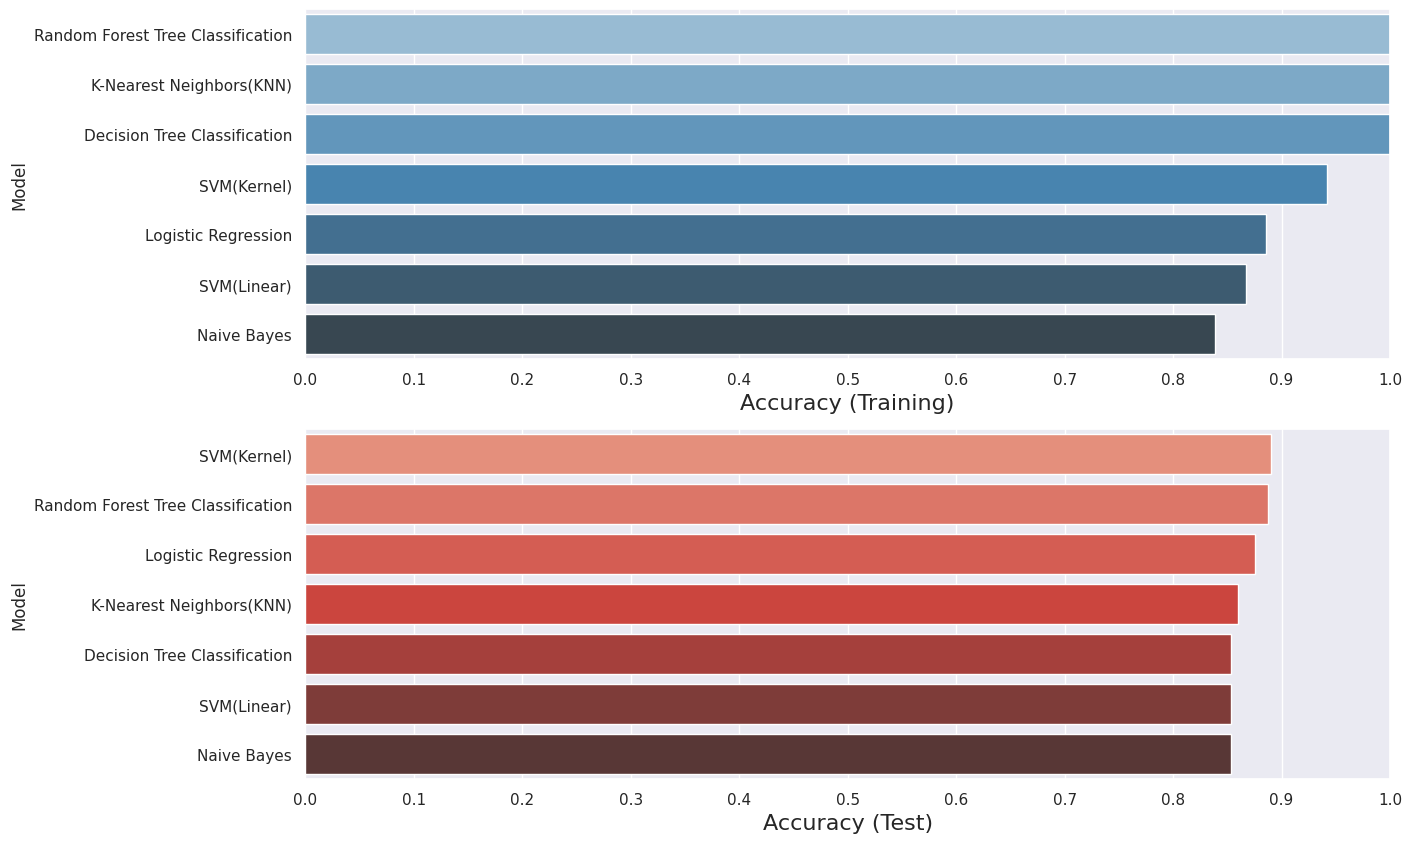

In [57]:
f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['Accuracy(training)'], ascending = False, inplace = True)

sns.barplot(x='Accuracy(training)', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('Accuracy (Training)', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

predict.sort_values(by=['Accuracy(test)'], ascending=False, inplace=True)

sns.barplot(x='Accuracy(test)', y='Model', data = predict, palette='Reds_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('Accuracy (Test)', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

각각 학습/검증 정확도를 비교 가능하다.
- SVM(linear)와 NB는 양쪽에서 가장 낮은 정확도를 보였다.  
- 결정트리는 학습 데이터에선 정확도가 1로 가장 높았지만 검증에선 5위에 들었다.
- 모든 모델이 학습 데이터의 정확도가 검증 데이터 정확도보다 높았지만 NB는 되려 검증 정확도가 더 높았다.

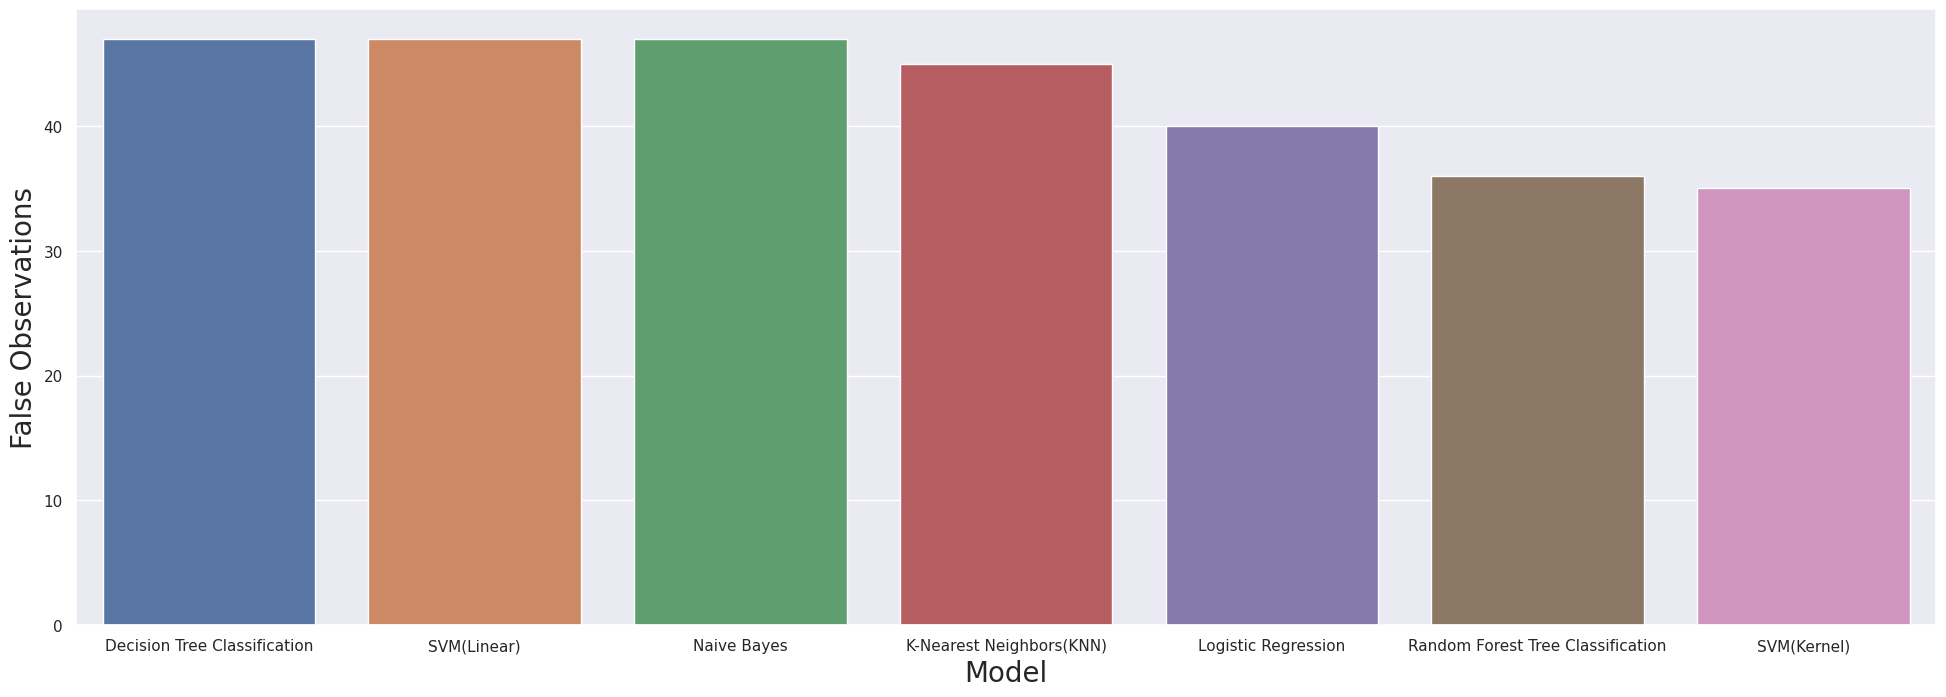

In [58]:
predict.sort_values(by=(['Accuracy(test)']), ascending = True, inplace = True)

f, axe = plt.subplots(1,1, figsize=(24,8))
sns.barplot(x = predict['Model'], y=predict['False Positive'] + predict['False Negative'], ax = axe)
axe.set_xlabel('Model', size=20)
axe.set_ylabel('False Observations', size=20)

plt.show()

노트북 제작자와 데이터 스플릿이 좀 다르게 된건지 약간 다른 결과가 나오긴 했다. (랜덤 스테이트 값도 같은데 도대체 왜 그런지 모르겠다.)  
결정트리, 선형SVM, 나이브 베이지안이 모두 47개로 가장 많은 잘못된 측정값을 갖고 있다.